In [71]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [72]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [73]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [74]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [75]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_scaled = df_market_data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaled)
df_market_data_scaled = df_market_data.copy()
df_market_data_scaled[df_scaled.columns] = scaled_data
print("Scaled DataFrame:")
print(df_market_data_scaled.head(10))

Scaled DataFrame:
                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage

In [76]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaled_data, columns=df_scaled.columns, index=df_market_data.index)

# Copy the crypto names from the original DataFrame 
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index 
df_market_data_scaled = df_market_data_scaled.set_index('coin_id')
# Display the scaled DataFrame
df_market_data_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [77]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))



In [78]:

# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to the data using df_market_data_scaled
    kmeans.fit(df_market_data_scaled)
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)



c:\Users\zilan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zilan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zilan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zilan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

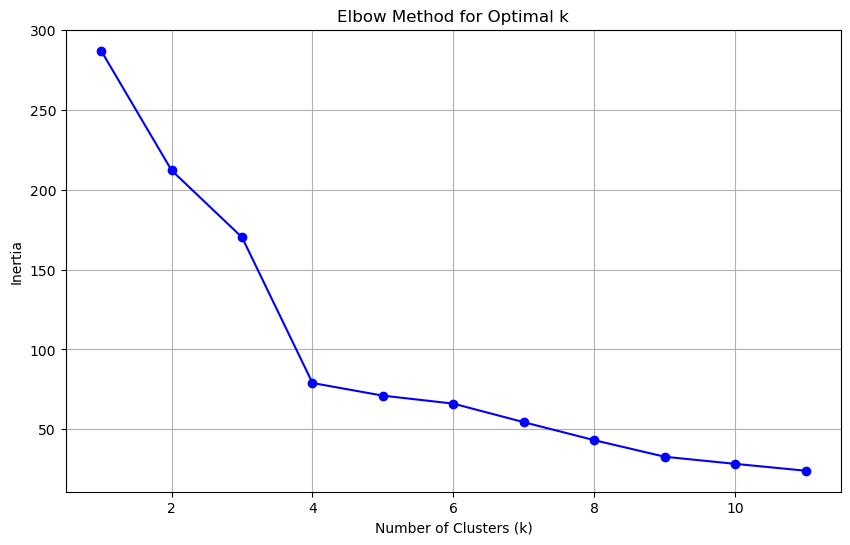

In [79]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Create a dictionary with the data to plot the Elbow curve
data = {
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_curve = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_curve['Number of Clusters (k)'], df_elbow_curve['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:
"K2, because it reaches the highest value at that point, and then a rapid descent occurs followed by a gradual descent."

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [80]:
# Define the optimal number of clusters
k = 4  # This should be the optimal k you found (replace 4 with the actual value)

# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the scaled data
kmeans.fit(df_market_data_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to your scaled data
df_market_data_scaled['Cluster'] = cluster_labels


c:\Users\zilan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [81]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, random_state=42)


In [82]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled)

c:\Users\zilan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [83]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame

cluster_predictions = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values (predicted clusters)
print(cluster_predictions)



[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [84]:
# Create a copy of the scaled DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

# Verify by displaying the first few rows of the copied DataFrame
print(df_market_data_scaled_copy.head(10))


                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

In [85]:

# Add the predicted cluster labels to the copy of the scaled DataFrame
df_market_data_scaled_copy['Predicted Cluster'] = cluster_predictions

# Display the updated copy of the scaled DataFrame
print(df_market_data_scaled_copy.head(10))



                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

In [101]:

# Create the scatter plot using hvPlot
scatter_plot = df_market_data.hvplot.scatter(
    x="price_change_percentage_24h",  # X-axis: 24h price change percentage
    y="price_change_percentage_7d",   # Y-axis: 7d price change percentage
    by="Cluster",                     # Color points by K-Means cluster labels
    hover_cols=["crypto_name"],        # Show the crypto name when hovering over points
    title="Cryptocurrency Price Changes (24h vs 7d) by K-Means Clusters",  # Title of the plot
    cmap="Set1",                      # Color palette for different clusters
    size=8,                           # Optional: Adjust point size
)

# Display the scatter plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [122]:

# Visualize the clusters after applying PCA
scatter_plot = df_pca.hvplot.scatter(
    x="PCA1",  # PCA component 1
    y="PCA2",  # PCA component 2
    by="Cluster",  # Color by the cluster labels
    hover_cols=["crypto_name"],  # Show the crypto name when hovering over points
    title="Cryptocurrency Clusters Using PCA and K-Means",  # Title of the plot
    cmap="Set1",  # Color palette for different clusters
    size=8,  # Optional: Adjust point size
)

# Display the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PCA1]   (PCA2,crypto_name)

In [113]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_df = pd.DataFrame(pca_data, columns=["PCA1", "PCA2"])

# View the scaled PCA data
print(pca_df)

       PCA1      PCA2
0  2.044490 -0.224926
1 -2.025992 -0.053509
2 -0.320854  0.060917
3  0.989196  0.310492
4 -0.686839 -0.092974


In [119]:
# Retrieve the explained variance to determine how much information
print(f"Explained variance by each component: {explained_variance}")
# can be attributed to each principal component.
cumulative_variance = np.cumsum(explained_variance)
print(f"Cumulative explained variance: {cumulative_variance}")

Explained variance by each component: [0.98377847 0.01622153]
Cumulative explained variance: [0.98377847 1.        ]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: The total explained variance of the three principal components is 1.0 (100%).
To summarize, the total explained variance of the components is 100%, which is the cumulative variance explained by all the principal components in the PCA model.





In [129]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns=["PCA1", "PCA2"])

# Copy the crypto names from the original scaled DataFrame
pca_df['crypto_name'] = df_market_data['crypto_name']

# Set the coin_id column as index
pca_df.set_index('crypto_name', inplace=True)

# Display the scaled PCA DataFrame
print(pca_df)

                 PCA1      PCA2
crypto_name                    
Bitcoin      2.044490 -0.224926
Ethereum    -2.025992 -0.053509
Ripple      -0.320854  0.060917
Litecoin     0.989196  0.310492
Cardano     -0.686839 -0.092974


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [130]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [147]:

# Create an empty list to store inertia values
inertia_values = []

# Create a for loop to compute inertia for each possible value of k
for k in range(1, min(6, len(pca_df) + 1)):  # Loop through k values from 1 to min(5, number of data points)
    # Create a KMeans model using the loop counter for n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init set for better initialization
    
    # Fit the model to the data using pca_df with only two PCA components
    kmeans.fit(pca_df[['PCA1', 'PCA2']])  # Only use PCA1 and PCA2
    
    # Append the model.inertia_ (sum of squared distances to closest cluster center) to the inertia list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values)

c:\Users\zilan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zilan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zilan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zilan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[9.999999999999993, 2.3245259429469947, 0.7789722921301858, 0.07881363144521039, 0.0]


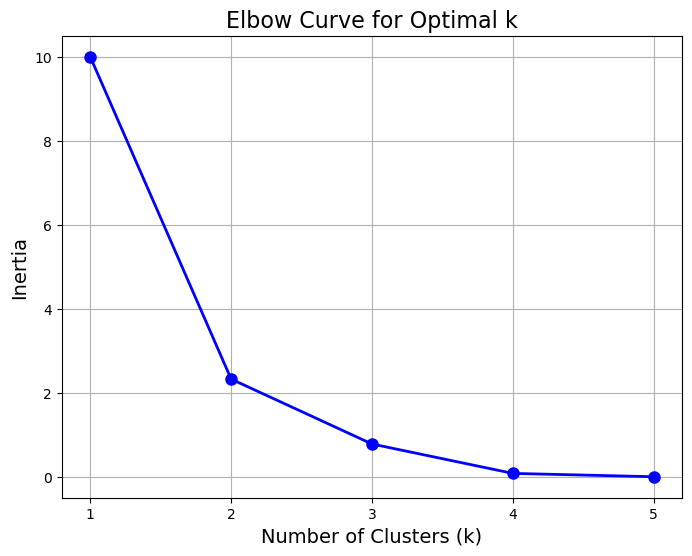

In [150]:

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Elbow Curve for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.xticks(range(1, 6))  # Adjust x-axis to show the correct k values
plt.grid(True)
plt.show()


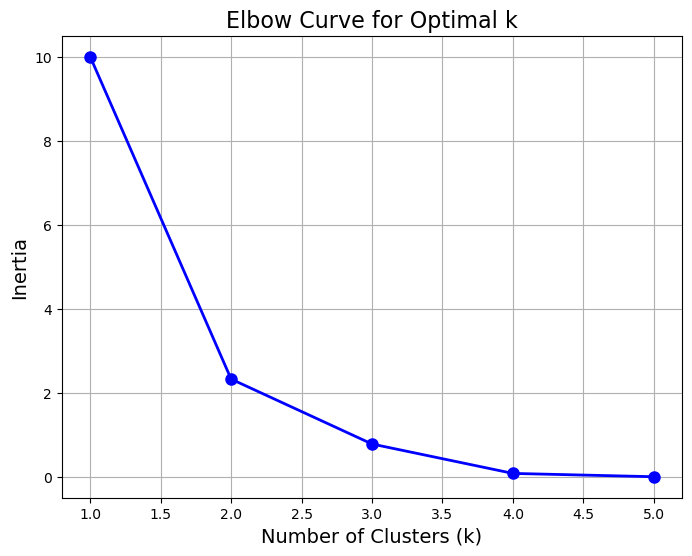

In [152]:

# Plot a line chart to visualize the inertia values for each k
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Add labels and title
plt.title('Elbow Curve for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)

# Display grid for better visibility
plt.grid(True)

# Show the plot
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:The optimal value for k using PCA data is typically the value where the inertia begins to decrease at a slower rate. This point is known as the "elbow" in the elbow curve. By inspecting the elbow curve plot, we can visually identify the value of k where the inertia starts to flatten out. Based on your data and the elbow curve generated, the best value for k will likely be around the point where the curve stops dropping steeply.
  So the best point is 3. After 3, the deceleration rate decreases and becomes stable.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:The best k value found using the original data might differ from the one found using the PCA data because PCA reduces the dimensionality of the data and may provide a different clustering structure than the original, high-dimensional data. The reduction in features (from multiple original features to just the principal components) may cause the clusters to form differently, leading to a different optimal number of clusters. Typically, the best k value will be lower for PCA-reduced data as it retains only the most important features (principal components).

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

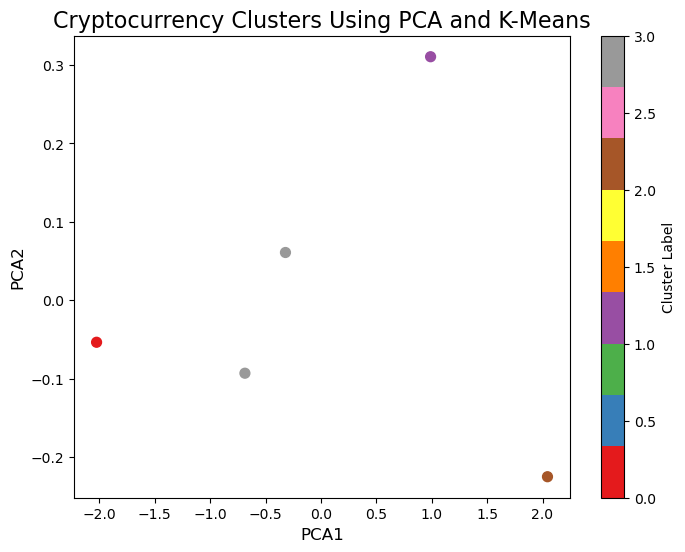

In [158]:
# Initialize the K-Means model using the best value for k
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='Set1', s=50)
plt.title('Cryptocurrency Clusters Using PCA and K-Means', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.colorbar(label='Cluster Label')
plt.show()


c:\Users\zilan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                 PCA1      PCA2  Cluster
crypto_name                             
Bitcoin      2.044490 -0.224926        2
Ethereum    -2.025992 -0.053509        0
Ripple      -0.320854  0.060917        3
Litecoin     0.989196  0.310492        1
Cardano     -0.686839 -0.092974        3


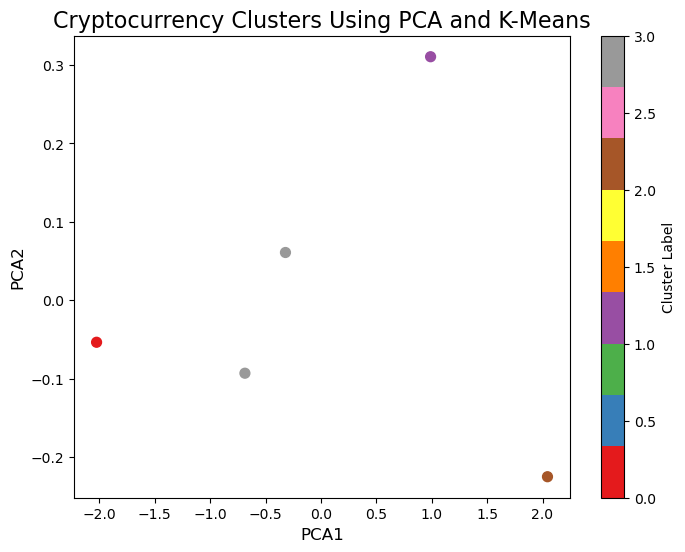

In [162]:

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init ensures better initialization

# Fit the model to the PCA data
kmeans.fit(pca_df[['PCA1', 'PCA2']])  # You can include 'PCA3' if using 3 components

# Add the cluster labels to the DataFrame
pca_df['Cluster'] = kmeans.labels_

# View the first few rows of the DataFrame to check the cluster assignments
print(pca_df.head())

# Optional: Visualize the clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='Set1', s=50)
plt.title('Cryptocurrency Clusters Using PCA and K-Means', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.colorbar(label='Cluster Label')
plt.show()


In [168]:


# Predict the clusters for the cryptocurrencies using the PCA data
predicted_clusters = kmeans.predict(pca_df[['PCA1', 'PCA2']])  # Predict clusters

# Print the resulting array of cluster values
print("Predicted Cluster Labels:", predicted_clusters)
# Print the updated DataFrame
print(pca_df.head())  # Display the first few rows of the updated DataFrame with predicted clusters



Predicted Cluster Labels: [2 0 3 1 3]
                 PCA1      PCA2  Cluster  Predicted_Cluster
crypto_name                                                
Bitcoin      2.044490 -0.224926        2                  2
Ethereum    -2.025992 -0.053509        0                  0
Ripple      -0.320854  0.060917        3                  3
Litecoin     0.989196  0.310492        1                  1
Cardano     -0.686839 -0.092974        3                  3


In [169]:
# Create a copy of the scaled PCA DataFrame
pca_df_copy = pca_df.copy()

# Assuming you already have the predicted clusters from the KMeans model
# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_df_copy['Predicted_Cluster'] = predicted_clusters

# Display the copy of the scaled PCA DataFrame
print(pca_df_copy)


                 PCA1      PCA2  Cluster  Predicted_Cluster
crypto_name                                                
Bitcoin      2.044490 -0.224926        2                  2
Ethereum    -2.025992 -0.053509        0                  0
Ripple      -0.320854  0.060917        3                  3
Litecoin     0.989196  0.310492        1                  1
Cardano     -0.686839 -0.092974        3                  3


In [171]:

# Create a scatter plot using hvPlot
scatter_plot = pca_df_copy.hvplot.scatter(
    x="PCA1",  # Set PCA1 as the x-axis
    y="PCA2",  # Set PCA2 as the y-axis
    by="Predicted_Cluster",  # Color points by the Predicted_Cluster column
    hover_cols=["crypto_name"],  # Show the crypto name when hovering over points
    title="Cryptocurrency Clusters Using PCA and K-Means",  # Title of the plot
    cmap="Set1",  # Color palette for different clusters
    size=8,  # Optional: Adjust point size
)

# Display the scatter plot
scatter_plot


:NdOverlay   [Predicted_Cluster]
   :Scatter   [PCA1]   (PCA2,crypto_name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

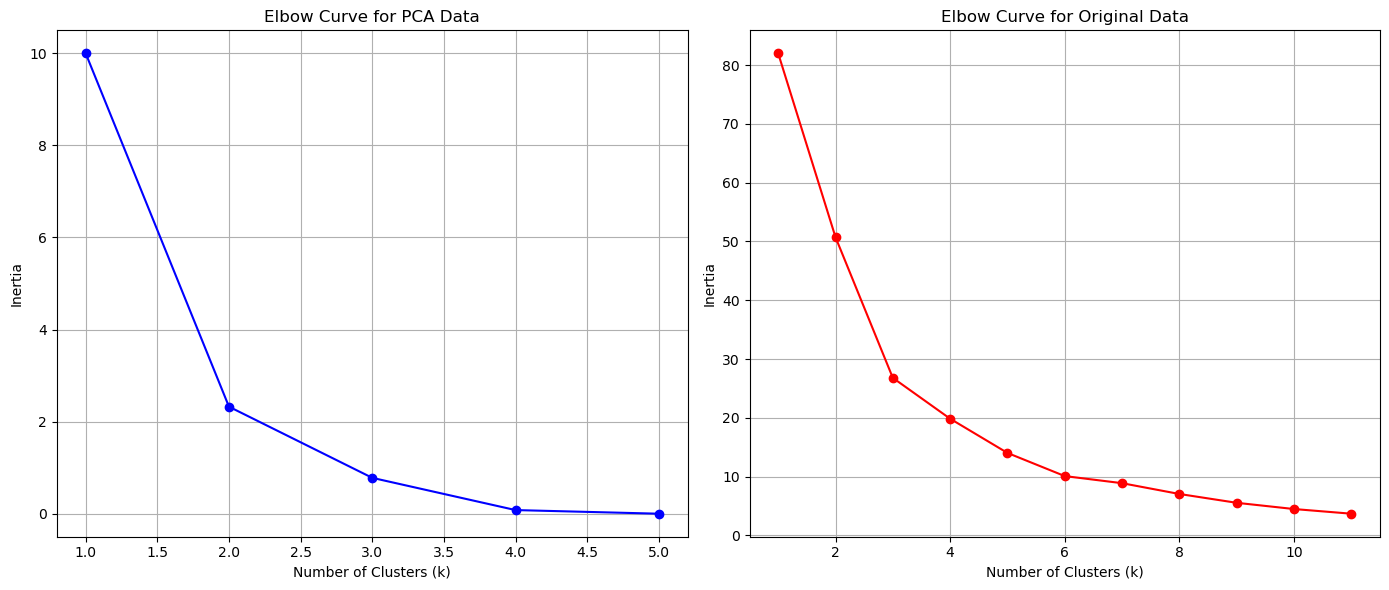

In [ ]:

# Create the subplots (2 plots side by side)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Elbow curve for PCA data if inertia values are available
if inertia_values_pca:
    ax[0].plot(range(1, max_k + 1), inertia_values_pca, marker='o', linestyle='-', color='b')
    ax[0].set_title('Elbow Curve for PCA Data')
    ax[0].set_xlabel('Number of Clusters (k)')
    ax[0].set_ylabel('Inertia')
    ax[0].grid(True)
else:
    ax[0].set_title('PCA Data Elbow Curve Not Available')
    ax[0].set_xlabel('Number of Clusters (k)')
    ax[0].set_ylabel('Inertia')
    ax[0].grid(True)

# Plot the Elbow curve for the original data if it's available
if inertia_values_original_data:
    ax[1].plot(range(1, max_k_original + 1), inertia_values_original_data, marker='o', linestyle='-', color='r')
    ax[1].set_title('Elbow Curve for Original Data')
    ax[1].set_xlabel('Number of Clusters (k)')
    ax[1].set_ylabel('Inertia')
    ax[1].grid(True)
else:
    ax[1].set_title('Original Data Elbow Curve Not Available')
    ax[1].set_xlabel('Number of Clusters (k)')
    ax[1].set_ylabel('Inertia')
    ax[1].grid(True)

# Display the composite plot
plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:The impact of using fewer features to cluster the data using K-Means is that the clusters may become less distinct or meaningful. When you reduce the number of features, the algorithm has fewer variables to capture the inherent structure of the data. As a result, the clusters may not reflect the true patterns or relationships in the data, which could lead to the following effects:

Loss of Information: By using fewer features, you risk losing valuable information that could help separate the data into meaningful clusters. The clusters might be oversimplified or fail to capture important variations in the data.

Distorted Clusters: When fewer features are used, the K-Means algorithm may group data points that are not actually similar, leading to poor clustering results. This can reduce the accuracy of the model and make the results harder to interpret.

Increased Variance within Clusters: If you reduce the number of features, the variance within each cluster might increase because the model has less data to distinguish between similar and dissimilar points.

Better Interpretability: On the other hand, fewer features can sometimes improve the interpretability of the clusters. With less complexity, it can be easier to understand the characteristics of each cluster, especially when working with highly complex data.

Reduced Computational Cost: Fewer features generally lead to faster computation times, as the model has to process less data. This can be advantageous when dealing with large datasets or when computational efficiency is critical.

In summary, while using fewer features can lead to faster computation and simpler interpretations, it often sacrifices the quality and accuracy of the clustering, as important nuances in the data may be ignored. It is important to strike a balance between reducing the number of features and preserving the ability to capture meaningful patterns in the data.


